# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import pandas as pd
import timeit
import time

# Visualise Train Dataset

In [2]:
df1 = pd.read_csv("../../data/3_datasets_new/train/1_RN_data_TRAIN.csv")
df1.drop(["c/b", "F"], axis=1, inplace=True)
df1

,a/c,a/t,phi,Mg
0,0.4,0.2,0.19635,1.17406
1,0.2,0.4,0.98175,1.30320
2,1.0,0.6,2.55254,1.19587
3,0.2,0.8,0.39270,1.99562
4,0.2,0.6,0.39270,1.60756
...,...,...,...,...
403,2.0,0.4,0.58905,0.74870
404,1.0,0.4,0.39270,1.14556
405,0.6,0.4,2.15984,1.14340
406,0.2,0.6,2.35619,1.57765


In [3]:
df2 = pd.read_csv("../../data/3_datasets_new/train/2_RN_eqn_TRAIN.csv")
df2.drop(["c/b", "F"], axis=1, inplace=True)
df2

,a/c,a/t,phi,Mg
0,1.00,0.7,2.40050,1.14526
1,1.90,0.6,2.80053,0.80007
2,0.65,0.8,2.15906,1.29751
3,0.25,0.5,1.49409,1.42963
4,1.20,0.6,2.49842,1.00304
...,...,...,...,...
106792,1.20,0.8,0.80875,1.00486
106793,1.50,0.8,1.30442,0.85492
106794,1.10,0.8,2.36069,1.07260
106795,1.60,0.7,0.98995,0.82583


In [4]:
df3a = pd.read_csv("../../data/3_datasets_new/train/3_FRANC3D_FULL_TRAIN.csv")
df3a.drop(["c/b", "F"], axis=1, inplace=True)
df3a

,a/c,a/t,phi,Mg
0,1.30,0.8,0.57435,1.00985
1,1.00,0.2,0.18003,1.14457
2,0.80,0.8,0.79683,1.23882
3,0.90,0.6,2.15516,1.12792
4,0.35,0.7,1.32011,1.45511
...,...,...,...,...
106792,0.45,0.7,0.18275,1.69819
106793,1.10,0.7,0.51333,1.12466
106794,1.70,0.3,0.15155,0.86065
106795,0.50,0.8,1.75330,1.30129


In [5]:
df3b = pd.read_csv("../../data/3_datasets_new/train/3_FRANC3D_PHI_SAMPLE_TRAIN.csv")
df3b.drop(["c/b", "F"], axis=1, inplace=True)
df3b

,a/c,a/t,phi,Mg
0,0.20,0.3,1.80193,1.25084
1,1.20,0.6,0.29560,1.08480
2,0.45,0.7,1.05160,1.36263
3,1.80,0.5,2.55494,0.78700
4,1.20,0.3,1.96027,0.95150
...,...,...,...,...
14185,0.80,0.6,0.60456,1.20717
14186,1.10,0.4,0.60167,1.04293
14187,1.80,0.7,0.01162,0.87561
14188,1.40,0.5,0.30001,0.96272


In [ ]:
d1 = df1.to_numpy()
d2 = df2.to_numpy()
d3a = df3a.to_numpy()
d3b = df3b.to_numpy()

d1.shape, d2.shape, d3a.shape, d3b.shape

# Polynomial SVM

## RN Dataset

In [3]:
df = pd.read_csv("../../data/3_datasets_new/train/1_RN_data_TRAIN.csv")
df.drop(["c/b", "F"], axis=1, inplace=True)
d = df.to_numpy()

degrees = [1, 2, 3, 4, 5, 6, 7, 8]

def poly_svm(data, degree):
    reg = SVR(kernel="poly", degree = degree)
    reg.fit(data[:,:-1], data[:,-1])
    return reg

times = []
regs = []
for degree in degrees:
    t0 = time.time()
    reg = poly_svm(d, degree)
    t1 = time.time()
    times.append(t1-t0)
    regs.append(reg)
    print("Done degree {}".format(degree))
    
# Loading test dataset
df = pd.read_csv("../../data/3_datasets_new/test/1_RN_data_TEST.csv")
df.drop(["c/b", "F"], axis=1, inplace=True)
d_test = df.to_numpy()

# Testing
MSE = []
for reg in regs:
    results = reg.predict(d_test[:,:-1])
    mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
    print("Mean squared error: ", mse)
    MSE.append(mse)

Done degree 1
Done degree 2
Done degree 3
Done degree 4
Done degree 5
Done degree 6
Done degree 7
Done degree 8
Mean squared error:  0.05040460608506867
Mean squared error:  0.030275217389641312
Mean squared error:  0.022786457204176686
Mean squared error:  0.03141332870812612
Mean squared error:  0.036162047513108926
Mean squared error:  0.04021069386660964
Mean squared error:  0.04551045309486689
Mean squared error:  0.048923367747252124


### Plots

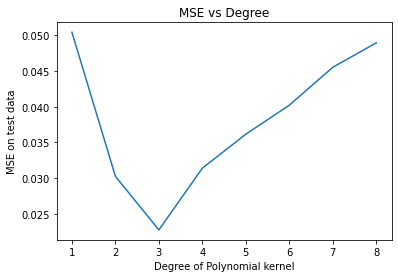

In [4]:
# Plotting
plt.plot(degrees, MSE)
plt.xlabel("Degree of Polynomial kernel")
plt.ylabel("MSE on test data")
plt.title("MSE vs Degree")
plt.show()

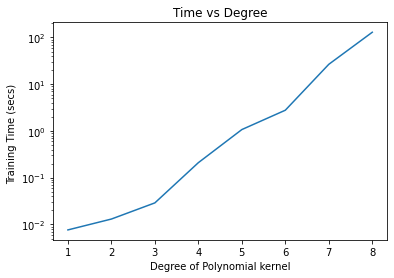

In [5]:
# Plotting
plt.plot(degrees, times)
plt.yscale('log',base=10)
plt.xlabel("Degree of Polynomial kernel")
plt.ylabel("Training Time (secs) ")
plt.title("Time vs Degree")
plt.show()

### Saving results

In [6]:
from joblib import dump, load
# saving models
i = 1
for reg in regs:
    dump(reg, 'poly_svm/models/d1/d1_poly_degree_{}.joblib'.format(i))
    i += 1
    
np.save("poly_svm/times/d1_times.npy", times)

In [7]:
np.save("poly_svm/times/d1_times.npy", times)

In [ ]:
# load models
# clf = load('filename.joblib')

## RN Equations

In [ ]:
df = pd.read_csv("../../data/3_datasets_new/train/2_RN_eqn_TRAIN.csv")
df.drop(["c/b", "F"], axis=1, inplace=True)
d = df.to_numpy()

degrees = [1, 2, 3, 4, 5]

def poly_svm(data, degree):
    reg = SVR(kernel="poly", degree = degree)
    reg.fit(data[:,:-1], data[:,-1])
    return reg

times = []
regs = []
for degree in degrees:
    t0 = time.time()
    reg = poly_svm(d, degree)
    t1 = time.time()
    times.append(t1-t0)
    regs.append(reg)
    print("Done degree {}".format(degree))
    
# Loading test dataset
df = pd.read_csv("../../data/3_datasets_new/test/2_RN_eqn_TEST.csv")
df.drop(["c/b", "F"], axis=1, inplace=True)
d_test = df.to_numpy()

# Testing
MSE = []
for reg in regs:
    results = reg.predict(d_test[:,:-1])
    mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
    print("Mean squared error: ", mse)
    MSE.append(mse)

Done degree 1
Done degree 2
Done degree 3
Done degree 4


### Plots

In [ ]:
# Plotting
plt.plot(degrees, MSE)
plt.xlabel("Degree of Polynomial kernel")
plt.ylabel("MSE on test data")
plt.title("MSE vs Degree")
plt.show()

# Plotting
plt.plot(degrees, times)
plt.yscale('log', base=10)
plt.xlabel("Degree of Polynomial kernel")
plt.ylabel("Training Time (secs) ")
plt.title("Time vs Degree")
plt.show()

### Saving results

In [ ]:
from joblib import dump, load
# saving models
i = 1
for reg in regs:
    dump(reg, 'poly_svm/models/d2/d2_poly_degree_{}.joblib'.format(i))
    i += 1
    
np.save("poly_svm/times/d2_times.npy", times)

## Franc3D Full

In [ ]:
df = pd.read_csv("../../data/3_datasets_new/train/3_FRANC3D_FULL_TRAIN.csv")
df.drop(["c/b", "F"], axis=1, inplace=True)
d = df.to_numpy()

degrees = [1, 2, 3, 4, 5]

def poly_svm(data, degree):
    reg = SVR(kernel="poly", degree = degree)
    reg.fit(data[:,:-1], data[:,-1])
    return reg

times = []
regs = []
for degree in degrees:
    t0 = time.time()
    reg = poly_svm(d, degree)
    t1 = time.time()
    times.append(t1-t0)
    regs.append(reg)
    print("Done degree {}".format(degree))
    
# Loading test dataset
df = pd.read_csv("../../data/3_datasets_new/test/3_FRANC3D_FULL_TEST.csv")
df.drop(["c/b", "F"], axis=1, inplace=True)
d_test = df.to_numpy()

# Testing
MSE = []
for reg in regs:
    results = reg.predict(d_test[:,:-1])
    mse = np.sum((d_results - d_test[:,-1])**2)/len(d_test)
    print("Mean squared error: ", mse)
    MSE.append(mse)

### Plots

In [ ]:
# Plotting
plt.plot(degrees, MSE)
plt.xlabel("Degree of Polynomial kernel")
plt.ylabel("MSE on test data")
plt.title("MSE vs Degree")
plt.show()

# Plotting
plt.plot(degrees, times)
plt.yscale('log',base=10)
plt.xlabel("Degree of Polynomial kernel")
plt.ylabel("Training Time (secs) ")
plt.title("Time vs Degree")
plt.show()

### Saving results

In [ ]:
from joblib import dump, load
# saving models
i = 1
for reg in regs:
    dump(reg, 'poly_svm/models/d3a/d3a_poly_degree_{}.joblib'.format(i))
    i += 1
    
np.save("poly_svm/times/d3a_times.npy", times)

## Franc3D Phi sampled

In [ ]:
df = pd.read_csv("../../data/3_datasets_new/train/3_FRANC3D_PHI_SAMPLE_TRAIN.csv")
df.drop(["c/b", "F"], axis=1, inplace=True)
d = df.to_numpy()

degrees = [1, 2, 3, 4, 5]

def poly_svm(data, degree):
    reg = SVR(kernel="poly", degree = degree)
    reg.fit(data[:,:-1], data[:,-1])
    return reg

times = []
regs = []
for degree in degrees:
    t0 = time.time()
    reg = poly_svm(d, degree)
    t1 = time.time()
    times.append(t1-t0)
    regs.append(reg)
    print("Done degree {}".format(degree))
    
# Loading test dataset
df = pd.read_csv("../../data/3_datasets_new/test/3_FRANC3D_PHI_SAMPLE_TEST.csv")
df.drop(["c/b", "F"], axis=1, inplace=True)
d_test = df.to_numpy()

# Testing
MSE = []
for reg in regs:
    results = reg.predict(d_test[:,:-1])
    mse = np.sum((d_results - d_test[:,-1])**2)/len(d_test)
    print("Mean squared error: ", mse)
    MSE.append(mse)

### Plots

In [ ]:
# Plotting
plt.plot(degrees, MSE)
plt.xlabel("Degree of Polynomial kernel")
plt.ylabel("MSE on test data")
plt.title("MSE vs Degree")
plt.show()

# Plotting
plt.plot(degrees, times)
plt.yscale('log',base=10)
plt.xlabel("Degree of Polynomial kernel")
plt.ylabel("Training Time (secs) ")
plt.title("Time vs Degree")
plt.show()

### Saving results

In [ ]:
from joblib import dump, load
# saving models
i = 1
for reg in regs:
    dump(reg, 'poly_svm/models/d3b/d3b_poly_degree_{}.joblib'.format(i))
    i += 1
    
np.save("poly_svm/times/d3b_times.npy", times)